In [35]:
from fbprophet import Prophet

In [36]:
import pandas as pd
import numpy as np

In [52]:
time_series = pd.read_csv("daily_reviews.csv")
time_series['ds'] = pd.to_datetime(time_series['_c0'])
date_index = pd.date_range(time_series.ds.min(), time_series.ds.max()).to_frame('ds')
date_index.columns = ['ds']
date_index = date_index.merge(time_series, on = 'ds', how = 'left')
date_index = date_index.drop('_c0', axis = 1).fillna(0)
date_index.columns = ['ds','y']
date_index['floor'] = 0
m = Prophet(daily_seasonality=False,
      yearly_seasonality = True,
      n_changepoints = 30,
      growth = 'linear',
      changepoints = ['2005-01-01','2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01',
              '2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01',
              '2017-01-01','2018-01-01','2019-01-01',
                      '2020-01-01','2020-03-01','2020-09-01','2021-01-01']
      )
m.add_seasonality(name = 'weekly', period =  7, fourier_order = 3)
m.add_country_holidays(country_name='US')

In [53]:
m.fit(date_index)

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.


In [71]:
columns = forecast.columns[6:-16]
days = [columns[i*6] for i in range(len(columns)//6)]

In [78]:
forecast.loc[forecast['holidays']!=0,['ds','holidays']].iloc[:20]

,ds,holidays
30,2004-11-11,105.796695
44,2004-11-25,-470.284406
73,2004-12-24,-328.123624
74,2004-12-25,-735.197197
80,2004-12-31,14.764772
81,2005-01-01,-245.532222
97,2005-01-17,87.900326
132,2005-02-21,262.425195
230,2005-05-30,-22.184917
265,2005-07-04,-267.599209


In [79]:
forecast = m.predict()


NameError: ignored

In [80]:
import matplotlib.pyplot as plt

<Figure size 1440x360 with 0 Axes>

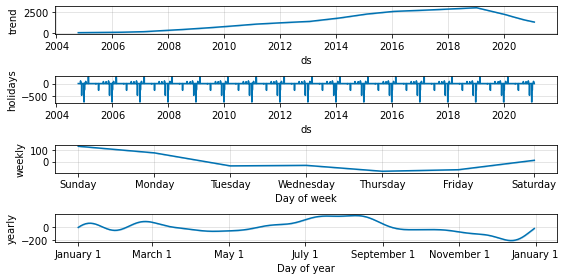

In [88]:

plt.figure(figsize=  [20,5])
m.plot_components(forecast,figsize=(8, 4))
plt.show()